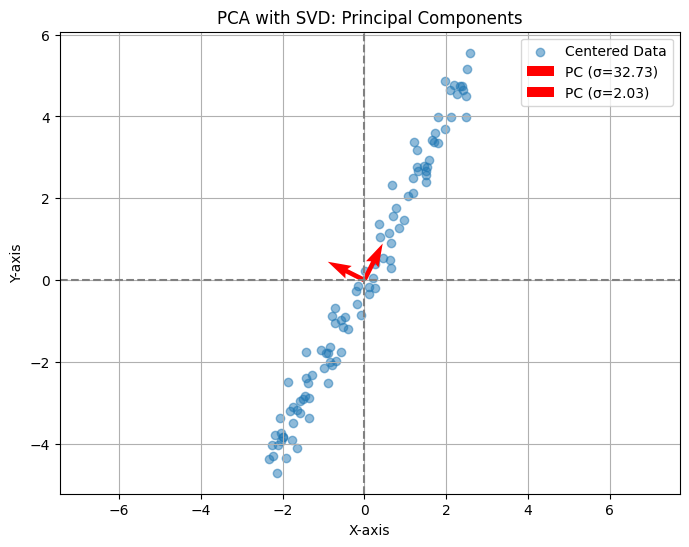

Singular Values (from SVD): [32.73238585  2.03037571]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create synthetic 2D data
np.random.seed(42)
x = np.random.rand(100) * 5
y = 2 * x + np.random.normal(0, 0.5, 100)  # Linear relation with noise
X = np.vstack((x, y)).T  # Data matrix (100 samples, 2 features)

# Step 2: Center the data
mean = np.mean(X, axis=0)
X_centered = X - mean

# Step 3: Compute SVD
U, Sigma, VT = np.linalg.svd(X_centered)

# Principal components are rows of VT
principal_components = VT.T

# Step 4: Project data onto principal components
X_pca = X_centered @ principal_components

# Step 5: Visualize original data and principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_centered[:, 0], X_centered[:, 1], alpha=0.5, label='Centered Data')

# Plot principal components
for length, vector in zip(Sigma, principal_components.T):
    plt.quiver(
        0, 0, vector[0], vector[1], 
        angles='xy', scale_units='xy', scale=1, 
        color='r', label=f'PC (σ={length:.2f})'
    )

plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.legend()
plt.title('PCA with SVD: Principal Components')
plt.axis('equal')
plt.show()

# Step 6: Print Singular Values
print("Singular Values (from SVD):", Sigma)


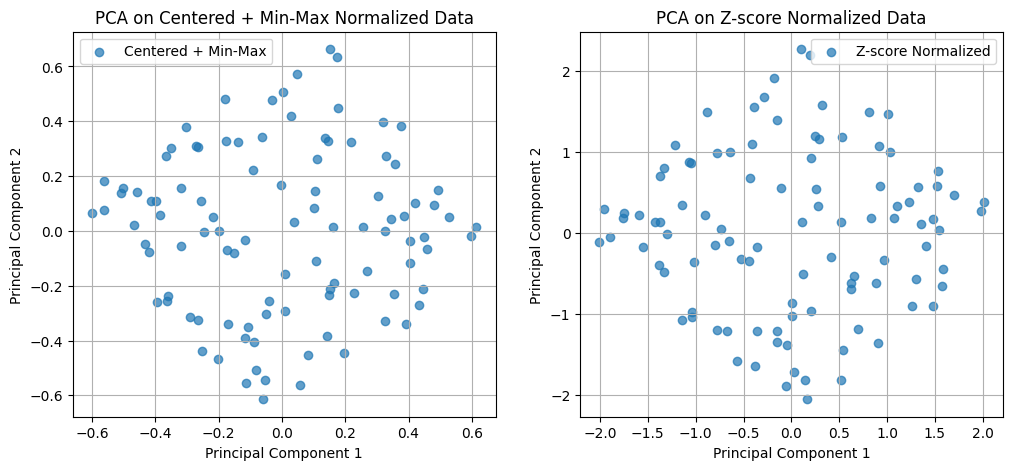

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

# Create synthetic data with different scales
np.random.seed(42)
x = np.random.rand(100) * 100   # Feature 1 (0 to 100)
y = np.random.rand(100) * 10    # Feature 2 (0 to 10)
X = np.vstack((x, y)).T  # Data matrix (100 samples, 2 features)

# Centering first, then Min-Max Normalization
X_centered = X - np.mean(X, axis=0)
min_max_scaler = MinMaxScaler()
X_centered_minmax = min_max_scaler.fit_transform(X_centered)

# Z-score Normalization (Centering included)
zscore_scaler = StandardScaler()
X_zscore = zscore_scaler.fit_transform(X)

# Perform PCA on both datasets
pca_centered_minmax = PCA(n_components=2)
X_pca_centered_minmax = pca_centered_minmax.fit_transform(X_centered_minmax)

pca_zscore = PCA(n_components=2)
X_pca_zscore = pca_zscore.fit_transform(X_zscore)

# Plot the results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_pca_centered_minmax[:, 0], X_pca_centered_minmax[:, 1], alpha=0.7, label='Centered + Min-Max')
plt.title('PCA on Centered + Min-Max Normalized Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_pca_zscore[:, 0], X_pca_zscore[:, 1], alpha=0.7, label='Z-score Normalized')
plt.title('PCA on Z-score Normalized Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend()

plt.show()


## Centering Data

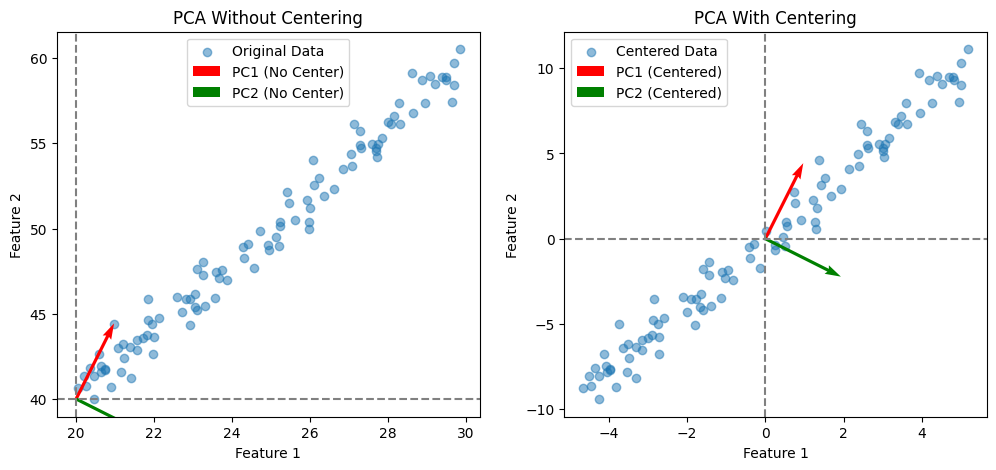

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Step 1: Create synthetic data
np.random.seed(42)
x = np.random.rand(100) * 10 + 20  # Shifted feature
y = 2 * x + np.random.normal(0, 1, 100)  # Linear relation
X = np.vstack((x, y)).T

# Step 2: PCA without centering
pca_no_center = PCA(n_components=2)
X_pca_no_center = pca_no_center.fit_transform(X)

# Step 3: Center the data
X_centered = X - np.mean(X, axis=0)

# Step 4: PCA with centering
pca_center = PCA(n_components=2)
X_pca_center = pca_center.fit_transform(X_centered)

# Step 5: Plot results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, label='Original Data')
plt.quiver(20, 40, *pca_no_center.components_[0], scale=5, color='r', label='PC1 (No Center)')
plt.quiver(20, 40, *pca_no_center.components_[1], scale=5, color='g', label='PC2 (No Center)')
plt.axhline(40, linestyle='--', color='gray')
plt.axvline(20, linestyle='--', color='gray')
plt.title('PCA Without Centering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_centered[:, 0], X_centered[:, 1], alpha=0.5, label='Centered Data')
plt.quiver(0, 0, *pca_center.components_[0], scale=5, color='r', label='PC1 (Centered)')
plt.quiver(0, 0, *pca_center.components_[1], scale=5, color='g', label='PC2 (Centered)')
plt.axhline(0, linestyle='--', color='gray')
plt.axvline(0, linestyle='--', color='gray')
plt.title('PCA With Centering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.show()


Data Matrix (100 samples, 3 features):
[[79.96714153 56.89685951 74.29344832]
 [73.61735699 56.79065898 76.72941432]
 [81.47688538 63.46793572 82.99661492]
 [90.23029856 68.17285251 82.64562462]
 [72.65846625 57.32034444 53.46796758]]

Centered Data Matrix (100 samples, 3 features):
[[  6.0056067   -2.38389128   3.51469329]
 [ -0.34417784  -2.49009182   5.95065928]
 [  7.51535055   4.18718493  12.21785988]
 [ 16.26876374   8.89210171  11.86686959]
 [ -1.30306857  -1.96040635 -17.31078745]]

Covariance Matrix (Manual Calculation):
[[ 82.47698936  60.07388185  22.55067044]
 [ 60.07388185  66.07005019  15.76779969]
 [ 22.55067044  15.76779969 169.29638914]]
Covariance Matrix (Manual Calculation):
[[ 82.47698936  60.07388185  22.55067044]
 [ 60.07388185  66.07005019  15.76779969]
 [ 22.55067044  15.76779969 169.29638914]]

Covariance Matrix (NumPy):
[[ 82.47698936  60.07388185  22.55067044]
 [ 60.07388185  66.07005019  15.76779969]
 [ 22.55067044  15.76779969 169.29638914]]


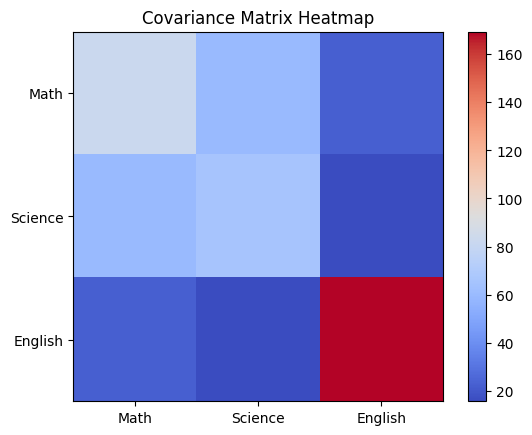

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create synthetic dataset (Math, Science, English scores)
np.random.seed(42)
math = np.random.normal(75, 10, 100)
science = math * 0.8 + np.random.normal(0, 5, 100)
english = np.random.normal(70, 12, 100)

# Step 2: Stack features into a matrix
X = np.vstack((math, science, english)).T

print("Data Matrix (100 samples, 3 features):")
print(X[:5])  # Display first 5 samples


# Step 3: Center the data (mean subtraction)
X_centered = X - np.mean(X, axis=0)

print("\nCentered Data Matrix (100 samples, 3 features):")
print(X_centered[:5])  # Display first 5 samples

# Step 4: Compute covariance matrix manually
cov_matrix_manual = (X_centered.T @ X_centered) / (X_centered.shape[0] - 1)

print("\nCovariance Matrix (Manual Calculation):")
print(cov_matrix_manual)

# Step 5: Compare with NumPy built-in function
cov_matrix_np = np.cov(X.T, bias=False)

# Display results
print("Covariance Matrix (Manual Calculation):")
print(cov_matrix_manual)

print("\nCovariance Matrix (NumPy):")
print(cov_matrix_np)

# Visualize covariance matrix
plt.imshow(cov_matrix_np, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title("Covariance Matrix Heatmap")
plt.xticks([0,1,2], ['Math','Science','English'])
plt.yticks([0,1,2], ['Math','Science','English'])
plt.show()
